
I will start the task of Car price prediction by importing the necessary Python libraries that we need for this task:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

Loading the Dataset:

In [ ]:
df = pd.read_csv('car data.csv')

Information of the Dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Last 5 rows in the dataset:

In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


Describes the dataset:

In [ ]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[301 rows x 9 columns]>

Chart 1 : Distribution of selling price

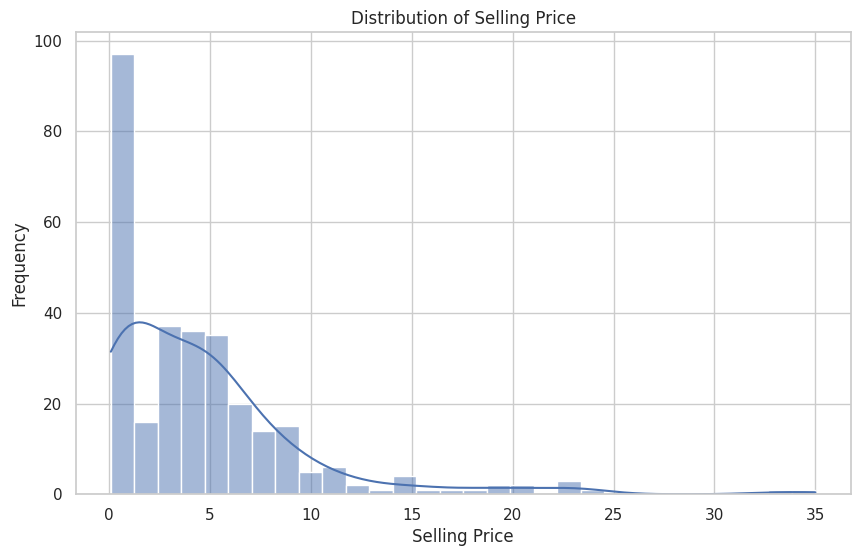

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

Chart 2: Car age vs Selling price

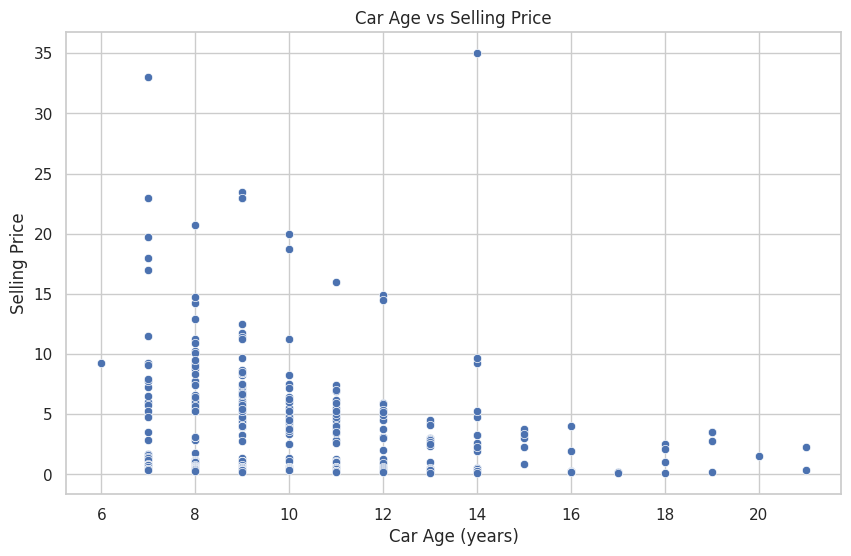

In [ ]:
df['Car_Age'] = 2024 - df['Year']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df)
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.show()

Chart 3: Present price vs Selling price

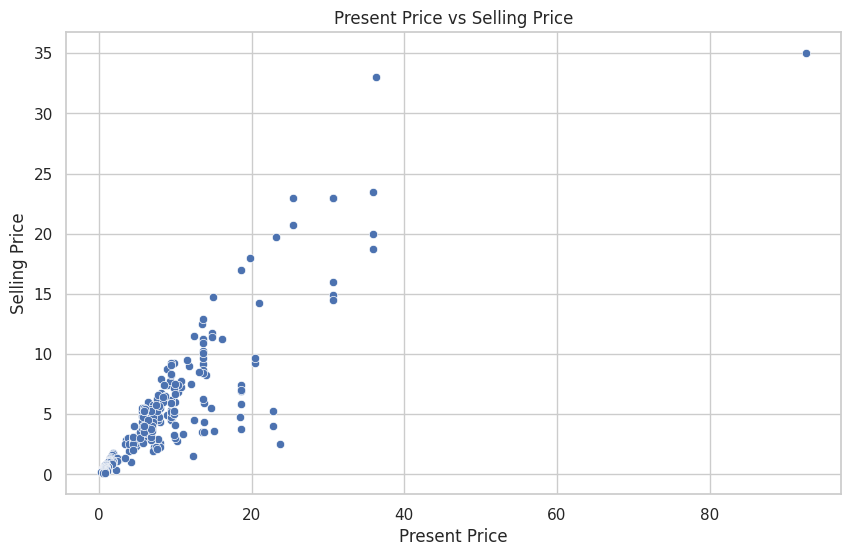

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

Chart 4: Driven KMs vs Selling price

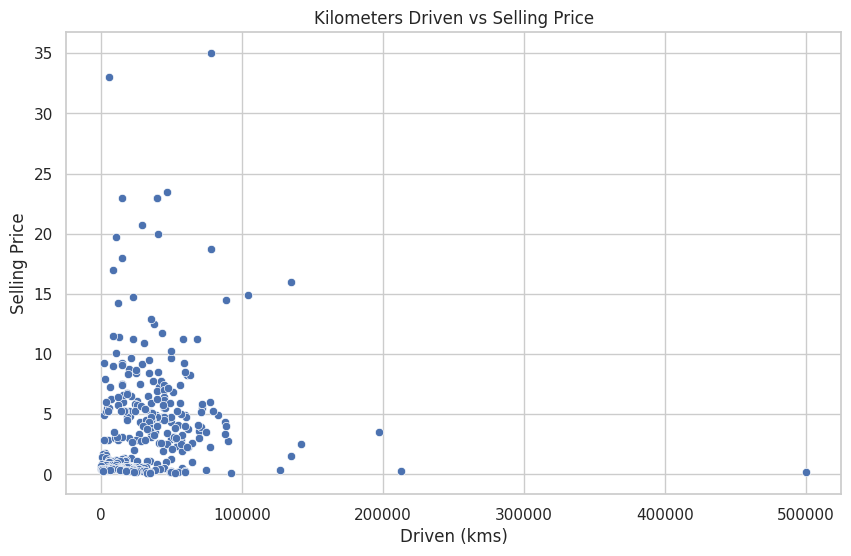

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Kilometers Driven vs Selling Price')
plt.xlabel('Driven (kms)')
plt.ylabel('Selling Price')
plt.show()

Chart 5: Frequency of fuel type , Selling price , Transmission

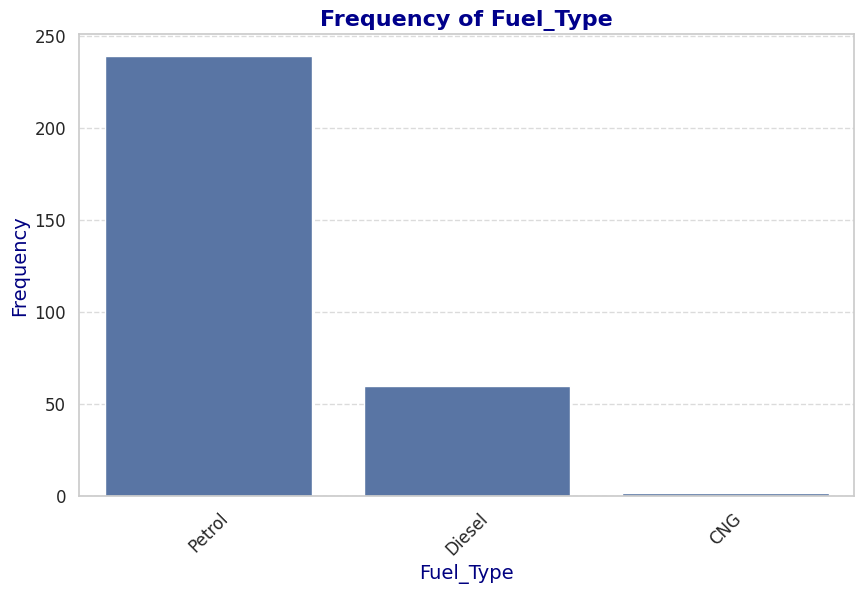

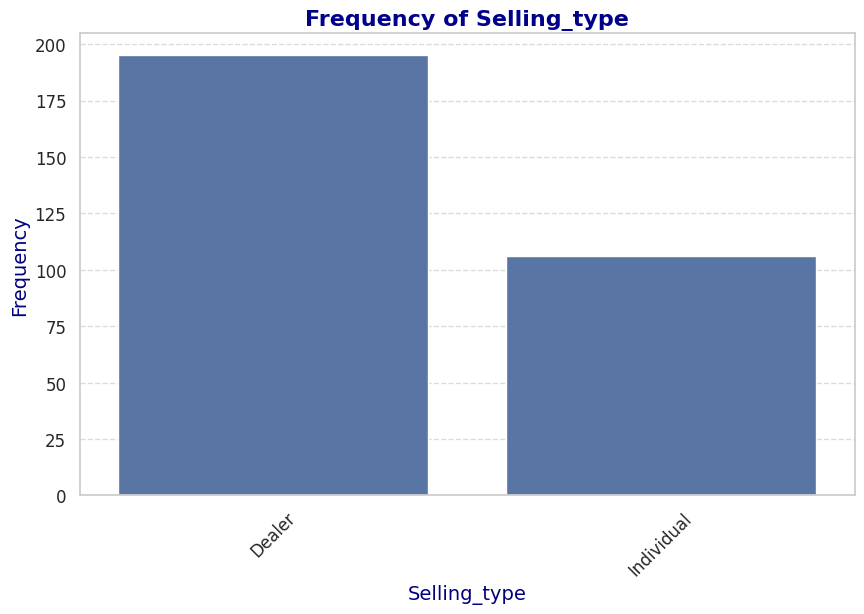

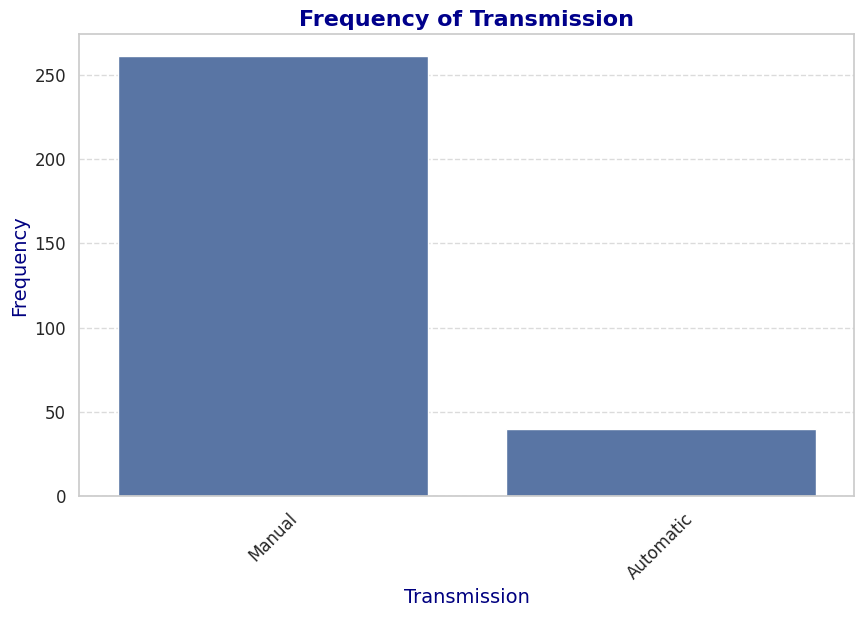

In [ ]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Frequency of {feature}', fontsize=16, color='darkblue', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='navy')
    plt.ylabel('Frequency', fontsize=14, color='navy')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Chart 6 : Comparing the Present price with the Frequencies

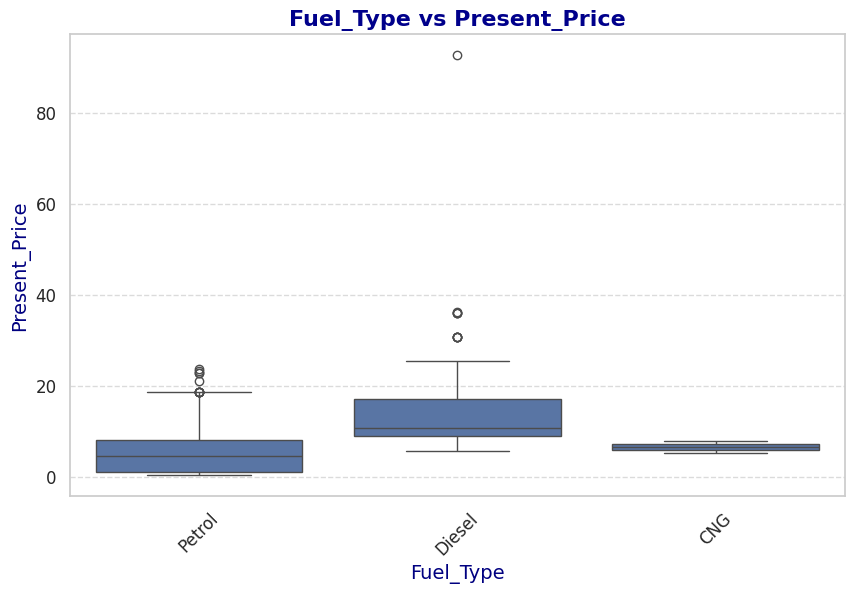

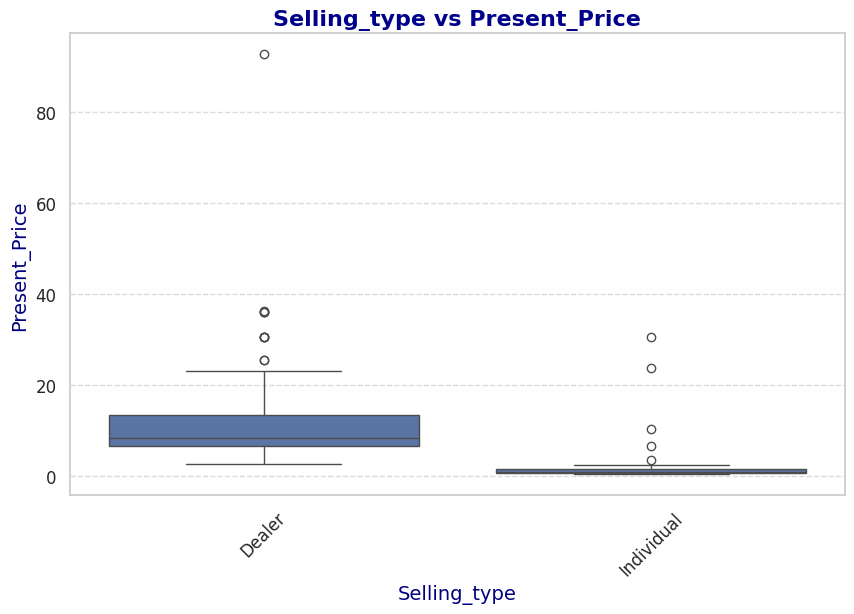

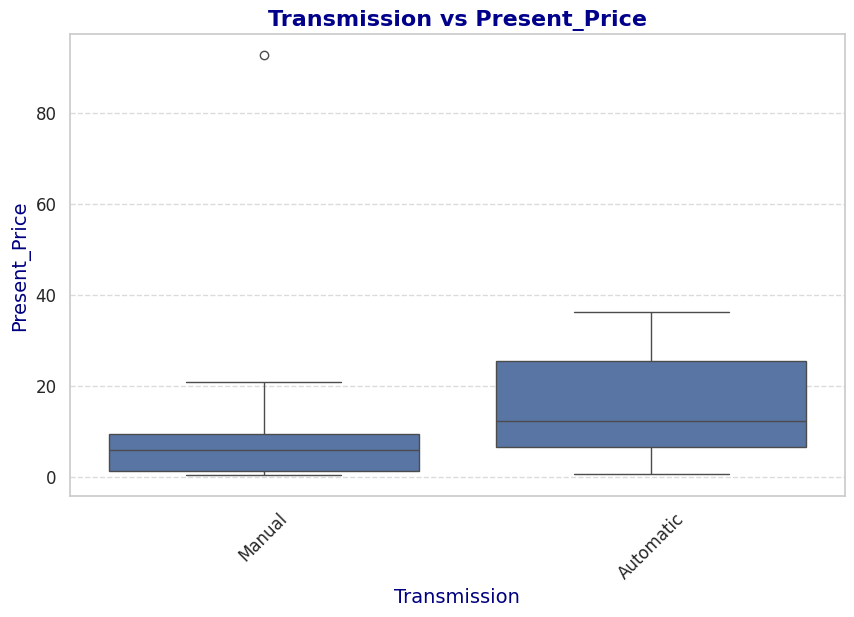

In [ ]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Present_Price', data=df)
    plt.title(f'{feature} vs Present_Price', fontsize=16, color='darkblue', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='navy')
    plt.ylabel('Present_Price', fontsize=14, color='navy')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Converting strings to float:

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

Splitting the dataset in two:

In [ ]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

Building a model:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluate the model:

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 3.5315798889694916
R-squared: 0.8466902419663456


Testing the model with sample data:

In [ ]:
new_car = [[2024, 20000, 0, 1, 1, 0, 0, 1]]
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 8802.675939811079
